In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
np.random.seed(100)

In [2]:
kmeans_data = pd.read_csv('custom_data_home/clustering.csv')
kmeans_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
X = kmeans_data[['LoanAmount','ApplicantIncome']]
print X.shape
X.head()

(381, 2)


,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


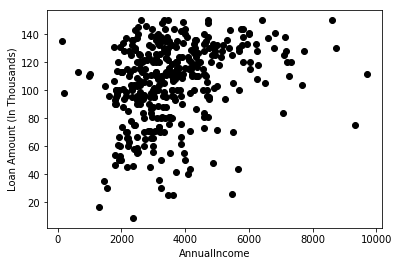

In [4]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:

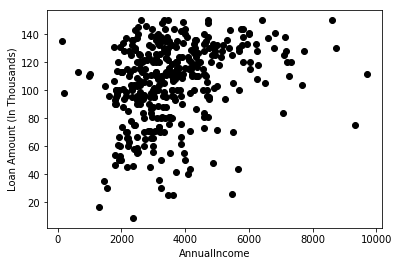

In [5]:
#number of clusters
K=3
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [6]:
Centroids = (X.sample(n=K))
Centroids

,LoanAmount,ApplicantIncome
163,120.0,7200
297,140.0,6000
103,95.0,1820


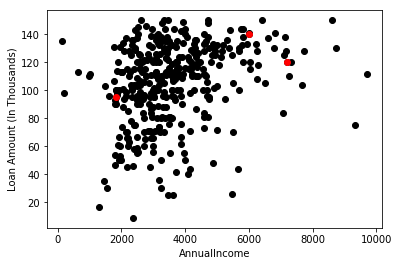

In [7]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


#### Step 3 - Assign all the points to the closest cluster centroid
#### Step 4 - Recompute centroids of newly formed clusters
#### Step 5 - Repeat step 3 and 4

In [8]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

In [9]:
dist_to_centroid =  pairwise_distances(X, Centroids, metric = 'euclidean')
dist_to_centroid

array([[2617.01222771, 1417.05081066, 2763.19706138],
       [4200.34712851, 3000.91252788, 1180.35630214],
       [4617.        , 3417.05853037,  763.40945763],
       ...,
       [4300.27917698, 3100.76780814, 1080.26663375],
       [3095.03408705, 1896.63807828, 2286.66154032],
       [2617.03228868, 1417.01728994, 2763.26129781]])

In [10]:
# assign the minimum distance of points to respective lables 
cluster_labels = np.argmin(dist_to_centroid, axis = 1)
cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1,

In [11]:
# update the centroid values 
updated_centroids = [np.asarray(np.mean(X[cluster_labels==i],axis=0)) for i in range(K)]
updated_centroids

[array([ 120.75 , 7643.125]),
 array([ 114.25714286, 4839.62857143]),
 array([ 100.27307692, 2821.03846154])]

In [12]:
diff = np.asarray(np.subtract(updated_centroids,Centroids).sum()).sum()
print diff
Centroids = updated_centroids

264.0722527472526


In [13]:
class Kmeans:
    def __init__(self,k,seed,max_iter = 200):
        self.k = k
        self.seed = seed
        self.max_iter = max_iter
    
    def initialise_centroids(self, data):
        self.centroids = (X.sample(n=self.k))
        return self.centroids
    
    def assign_clusters(self, data):
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        # assign the minimum distance of points to respective lables 
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        return self.cluster_labels
    
    def update_centroids(self,data):
        self.updated_centroids = [np.asarray(np.mean(data[self.cluster_labels==i],axis=0)) for i in range(self.k)] 
        self.diff = np.asarray(np.subtract(self.updated_centroids,self.centroids).sum()).sum()
        return self.updated_centroids
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):
            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if self.diff != 0:
                print("Running Model Iteration {} diff = {} ".format(iter,self.diff))
        print("Model finished running")
        return self   


### Elbow Method :
it involves estimating the model using various numbers of clusters and calculating the negative of the within-cluster sum of squares for each number of clusters chosen using the score method from sklearn.


We choose the number where adding further clusters only marginally increases the score

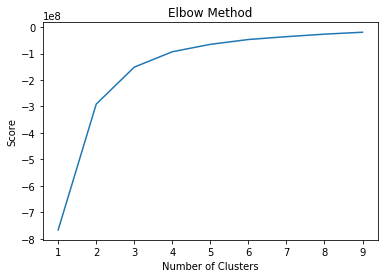

In [14]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [15]:
test_kmeans = Kmeans(4, 1, 600)
fitted = test_kmeans.fit_kmeans(X)
predicted_values = test_kmeans.predict(X)


Running Model Iteration 0 diff = 625.200603448 
Running Model Iteration 1 diff = 615.436431474 
Running Model Iteration 2 diff = 493.035485019 
Running Model Iteration 3 diff = 336.669337391 
Running Model Iteration 4 diff = 440.158496184 
Running Model Iteration 5 diff = 434.000656522 
Running Model Iteration 6 diff = 268.978108026 
Running Model Iteration 7 diff = 156.430929284 
Running Model Iteration 8 diff = 234.159019738 
Running Model Iteration 9 diff = 160.373505721 
Running Model Iteration 10 diff = 258.124446174 
Running Model Iteration 11 diff = 80.8804980548 
Running Model Iteration 12 diff = 98.7302883558 
Running Model Iteration 13 diff = 62.6632269748 
Running Model Iteration 14 diff = 104.276461537 
Running Model Iteration 15 diff = 74.8052884479 
Running Model Iteration 16 diff = 114.60340833 
Running Model Iteration 17 diff = 85.9156826587 
Running Model Iteration 18 diff = 12.7695738217 
Model finished running


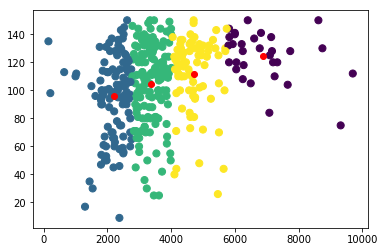

In [16]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],s=50,cmap='viridis',c=predicted_values)
centers = np.asarray(fitted.centroids)
plt.scatter(centers[:,1],centers[:,0],c='red')